In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['प्रभाकर',
 'जालिंदर',
 'अविंनाश',
 'निर्थला',
 'दिपाली',
 'शीतल',
 'उल्हास',
 'लक्ष्मी',
 'उदय',
 'सुभद्रा']

In [4]:
len(words)

34916

In [5]:
min(len(w) for w in words)

3

In [6]:
max(len(w) for w in words)

22

In [11]:
chars = list(set(''.join(words)))
len(chars)

63

In [8]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [9]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('ा', '<E>'), 6362),
 (('्', 'र'), 4521),
 (('<S>', 'स'), 4485),
 (('र', 'ा'), 4219),
 (('ी', '<E>'), 4014),
 (('ब', 'ा'), 3272),
 (('र', '<E>'), 3122),
 (('ा', 'ई'), 2571),
 (('ा', 'र'), 2560),
 (('ई', '<E>'), 2544),
 (('न', 'ा'), 2516),
 (('<S>', 'प'), 2466),
 (('<S>', 'क'), 2387),
 (('<S>', 'श'), 2378),
 (('<S>', 'म'), 2254),
 (('ं', 'द'), 2237),
 (('<S>', 'अ'), 2229),
 (('त', 'ा'), 2157),
 (('<S>', 'र'), 2107),
 (('र', '्'), 2011),
 (('ा', 'ब'), 1974),
 (('न', '<E>'), 1955),
 (('प', '्'), 1873),
 (('ा', 'म'), 1844),
 (('ल', 'ा'), 1822),
 (('क', '्'), 1818),
 (('ि', 'ं'), 1801),
 (('म', 'ा'), 1786),
 (('त', '्'), 1754),
 (('द', '्'), 1720),
 (('ा', 'व'), 1720),
 (('क', 'ा'), 1671),
 (('स', 'ु'), 1608),
 (('्', 'त'), 1607),
 (('<S>', 'व'), 1603),
 (('<S>', 'द'), 1523),
 (('ा', 'ज'), 1523),
 (('ं', 'त'), 1518),
 (('ा', 'ं'), 1513),
 (('<S>', 'न'), 1506),
 (('द', 'ा'), 1466),
 (('ा', 'न'), 1439),
 (('भ', 'ा'), 1429),
 (('<S>', 'ग'), 1427),
 (('व', '<E>'), 1401),
 (('म', '<E>'), 1398)

In [10]:
import torch

In [16]:
N = torch.zeros((64, 64), dtype=torch.int32)

In [17]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [18]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [21]:
N[0]

tensor([   0,    0,    0, 2229,  812,  379,   61,  403,   35,   39,   44,   39,
          26,   54, 2387,  229, 1427,  197, 1034,   98, 1379,   81,    3,   32,
          87,   47,   17,    0,  740,   17, 1523,  394, 1506, 2466,  345, 1230,
         822, 2254,  321, 2107,    0,  608,    1, 1603, 2378,   12, 4485,  963,
           0,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0], dtype=torch.int32)

In [22]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 6.3839e-02, 2.3256e-02, 1.0855e-02,
        1.7471e-03, 1.1542e-02, 1.0024e-03, 1.1170e-03, 1.2602e-03, 1.1170e-03,
        7.4464e-04, 1.5466e-03, 6.8364e-02, 6.5586e-03, 4.0870e-02, 5.6421e-03,
        2.9614e-02, 2.8067e-03, 3.9495e-02, 2.3199e-03, 8.5920e-05, 9.1649e-04,
        2.4917e-03, 1.3461e-03, 4.8688e-04, 0.0000e+00, 2.1194e-02, 4.8688e-04,
        4.3619e-02, 1.1284e-02, 4.3132e-02, 7.0627e-02, 9.8809e-03, 3.5227e-02,
        2.3542e-02, 6.4555e-02, 9.1935e-03, 6.0345e-02, 0.0000e+00, 1.7413e-02,
        2.8640e-05, 4.5910e-02, 6.8106e-02, 3.4368e-04, 1.2845e-01, 2.7580e-02,
        0.0000e+00, 5.7280e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [24]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'न'

In [25]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [27]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [42]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

नकिंड.
अमुल.
फकुभित्रू.
भुंनीनज.
स्रुगणनेता.
ठला.
क्नच.
आश्नासुन.
सिंता.
आनाद.
कुख.
इक्निसाथ.
बांद.
रीली.
अर.
पुमेबकुद.
नालांगिद्त्ती.
मेवीबज.
वाजबांुई.
वैष.


In [48]:
log_likelihood = 0.0
n = 0

for w in words:
# for w in ["पांडुरंगफ"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-732438.5625)
nll=tensor(732438.5625)
2.680706024169922


In [49]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. प
प ्
् र
र भ
भ ा
ा क
क र
र .


In [50]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=64).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.,

In [52]:
xenc.shape

torch.Size([8, 64])

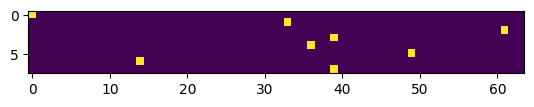

In [54]:
plt.imshow(xenc)

In [55]:
xenc.dtype

torch.float32

In [61]:
W = torch.randn((64, 64))
t = xenc @ W
t.shape

torch.Size([8, 64])

In [62]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0051, 0.0197, 0.0120, 0.0050, 0.0198, 0.0018, 0.0180, 0.1225, 0.0072,
         0.0032, 0.0150, 0.0038, 0.0617, 0.0071, 0.0040, 0.0220, 0.0075, 0.0065,
         0.0286, 0.0152, 0.0050, 0.0018, 0.0239, 0.0283, 0.0403, 0.0097, 0.0119,
         0.0028, 0.0060, 0.0118, 0.0045, 0.0116, 0.0159, 0.0041, 0.0058, 0.0119,
         0.0399, 0.0027, 0.0065, 0.0093, 0.0077, 0.0072, 0.0088, 0.0722, 0.0192,
         0.0010, 0.0086, 0.0090, 0.0020, 0.0032, 0.0131, 0.0055, 0.0030, 0.0143,
         0.0066, 0.0352, 0.0305, 0.0115, 0.0024, 0.0182, 0.0093, 0.0048, 0.0648,
         0.0027],
        [0.0070, 0.0114, 0.0049, 0.0128, 0.0050, 0.0040, 0.0049, 0.0503, 0.0149,
         0.0258, 0.0235, 0.0057, 0.0154, 0.0541, 0.1071, 0.0029, 0.0194, 0.0266,
         0.0029, 0.0077, 0.0041, 0.0245, 0.0085, 0.0159, 0.0160, 0.0092, 0.0157,
         0.0263, 0.0158, 0.0027, 0.0135, 0.0032, 0.0044, 0.0015, 0.0152, 0.0025,
         0.0568, 0.0049, 0.0207, 0.0124, 0.0090, 0.0053, 0.0464, 0.0072, 0.0081,
         0

In [63]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((64, 64), generator=g)

In [65]:
xenc = F.one_hot(xs, num_classes=64).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [66]:
probs.shape

torch.Size([8, 64])

In [67]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .प (indexes 0,33)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0396, 0.0065, 0.0080, 0.0027, 0.0110, 0.0080, 0.0018, 0.0151, 0.0089,
        0.0204, 0.0052, 0.0181, 0.0059, 0.0054, 0.0326, 0.1551, 0.0393, 0.0016,
        0.0162, 0.0036, 0.0221, 0.0071, 0.0019, 0.0129, 0.0077, 0.1002, 0.0952,
        0.0042, 0.0024, 0.0112, 0.0028, 0.0171, 0.0087, 0.0306, 0.0037, 0.0035,
        0.0014, 0.0289, 0.0024, 0.0279, 0.0031, 0.0065, 0.0058, 0.0115, 0.0022,
        0.0254, 0.0150, 0.0131, 0.0087, 0.0014, 0.0093, 0.0184, 0.0142, 0.0026,
        0.0096, 0.0030, 0.0121, 0.0132, 0.0033, 0.0038, 0.0094, 0.0067, 0.0029,
        0.0018])
label (actual next character): 33
probability assigned by the net to the the correct character: 0.030575022101402283
log likelihood: -3.487571954727173
negative log likelihood: 3.487571954727173
--------
bigram example 2: प् (indexes 33,61)
input to the neural net: 33
output probabilities from the neural net

In [73]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((64, 64), generator=g, requires_grad=True)

number of examples:  273226


In [95]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=64).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -10 * W.grad

print(loss.item())

2.7085535526275635


In [112]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=64).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

नकिंड.
अमुल.
फकुभित्रू.
भुंनीनज.
स्रुगणनेता.
